# 1. Bash: cómo sentirte un casi hacker

![image](imgs/1.png)

## 1.1. Introducción a conceptos básicos

### ¿Qué es Bash?

**Bash** es un command language interpreter (CLI, intérprete de comandos) que funciona por default en los sistemas GNU/Linux. Es el terreno en el que los administradores de sistemas se mueven como pez en el agua, pero hay algunas tareas que tenemos que realizar como data scientists para las cuales tener conocimientos básicos nos viene muy bien. 

Podemos pensar a Bash como una especie de "metalenguaje": Python, R, JavaScript, y una infinidad más de lenguajes tienen sus conectores con bash de forma nativa y cuentan con la posibilidad de ejecutar código bash sin mayores inconvenientes. 

### ¿Para qué lo necesitamos?
En un sentido amplio, hay dos situaciones muy típicas en las que podemos necesitar recurrir a Bash:
- Instalación de librerías y generación de entornos virtuales: vamos a entrar en profundidad un poco más adelante en este tema, pero la idea es crear ambientes autocontenidos donde no haya conflictos entre las distintas dependencias (por ejemplo, un proyecto en el que trabajamos requiere una versión específica de Pandas).
- Puesta en producción de modelos y entornos cloud: los Jupyter Notebooks son excelentes para explorar datos, testear hipótesis e inclusive clases practicas (como este notebook! :) ), pero son pésimas para la puesta en producción **profesional** de modelos de Machine Learning. Vamos a ver un poco más adelante que la forma "correcta" de hacerlo involucra reconstruir el código Python que funciona en el notebook para que pueda ser ejecutable mediante un comando de Bash. 

### ¿Qué es la terminal?

También llamada **consola**, a través de la **terminal** podemos darle comandos a este "metalenguaje". Es la forma que tenemos de interactuar con la computadora (tanto en un entorno local como en la nube), diciéndole qué necesitamos que haga. Mediante estos comandos podemos dar indicaciones súper simples o extremadamente complejas (no va a ser nuestro caso).

Esto es una terminal:

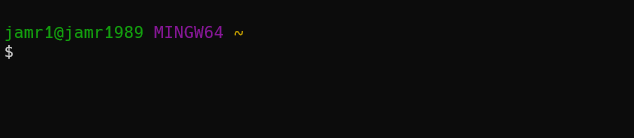

- El primer "jamr" es el nombre de mi usuario.
- Luego de la arroba vemos el nombre de mi computadora (jamr1989).
- Luego de los dos puntos vemos dónde está parada esa terminal (el path). La virgulilla (a que no sabían que el cosito de la eñe se llama así?) indica el home.
- El signo dolar es el fin del path, y lo que vemos al lado es un prompt, que va a estar titilando (lo que quiere decir que está esperando un comando).

## 1.2 Nuestros primeros pasos

Veamos un primer ejemplo de algunos comandos típicos de bash:

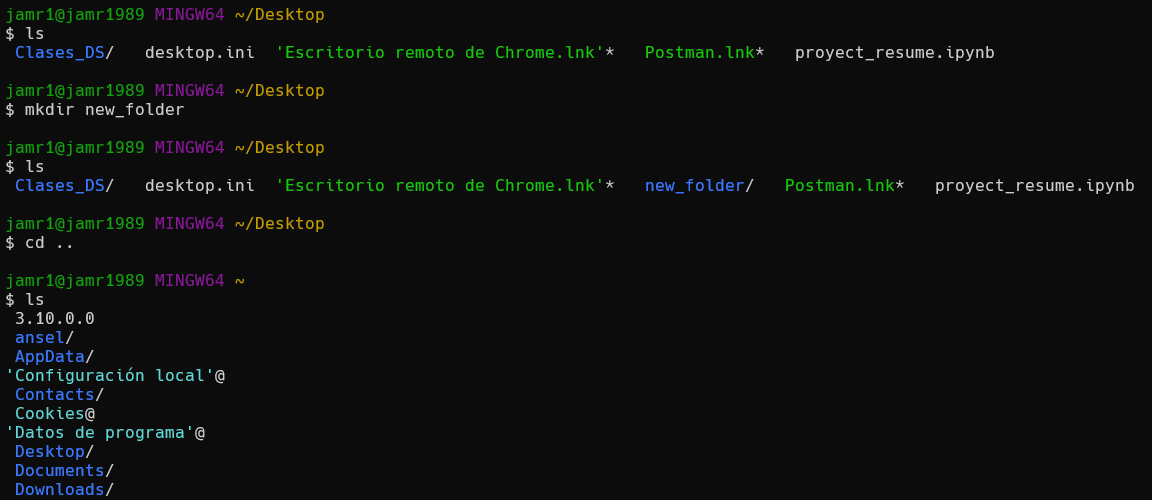

- **cd** nos permite cambiar de directorio. La primera línea lo que hace es decirle a la consola que cambie de directorio. 
- Al ejecutarla vemos que ahora el path cambio (~/Desktop), corroborando que estamos en esa carpeta.
- Aquí aparece un comando: **ls**. Con eso lo que hacemos es listar los archivos y carpetas disponibles en esa ruta específica. Cabe mencionar que hay formas de pasarle argumentos a los distintos comandos para, por ejemplo, poder ver cuánto pesa cada archivo. Al ejecutarlo vemos que en esa carpeta hay otros archivos.
- Con **mkdir** creamos una nueva carpeta llamada new_folder.
- Verificamos con ls que se creó.
- ¿Y qué pasa si queremos volver para atrás? Hacemos **cd ..**, que nos trae a la carpeta anterior del path. 
- Vemos que al cambiar de directorio nuevamente cambio el path, y haciendo un **ls** verificamos.

Vamos con algo un poco más interesante. Habíamos dicho que una de las cosas más interesantes (y necesarias) de bash tiene que ver con la generación de entornos autocontenidos y librerías necesarias para cada proyecto.

Un caso muy típico es estar trabajando en la propia computadora y no saber cómo es el delicadísimo balance de librerías que permitió que eso corriera. 

Entonces... el combo de Bash + Python sale al rescate! Veamos cómo:

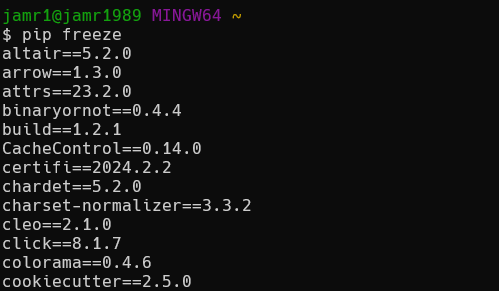

- El comando que sigue es `pip freeze`. Atención a este detalle: mientras que ls, cd, mkdir y demás son comandos de bash, acá estamos *ejecutando código python desde bash*. Es una diferencia muy importante, porque lo que tenemos que lograr es poder hacer exactamente esto, pero con código python un poco más interesante (ejecución de ETLs, predicciones de modelos, etc.). En este caso, el output de  `pip freeze` (que de nuevo, es código Python) es todas las dependencias que tiene instaladas este entorno específico en el que estamos.

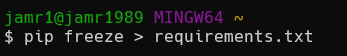

- El output de la consola, por útil que sea saber cuáles son las dependencias que tenemos, de poco nos sirve en este formato. Aparece al rescate otro operador de bash: el signo mayor **>**. Lo que hace es tomar el resultado del comando anterior y escribirlo en algún archivo. Entonces en nuestro caso vemos que el resultado de la ejecución del `pip freeze` está siendo escrito en un archivo llamado *requirements.txt*.
- Haciendo un **ls** verificamos que el archivo se escribió correctamente. ¿Podemos inspeccionarlo? ¡Claro que sí! Hay muchas formas, pero dejo las dos más sencillas:

    - El comando **head** hace lo mismo que pasa en Python: devuelve las diez primeras líneas del archivo.
    - Si queremos ver el resultado entero, el comando **cat** devuelve en consola todo el archivo entero.

### 1.3. Nuestro primer ejecutable

Bash tiene un bloc de notas incorporado, al cual accedemos con el comando **nano**. Si el archivo existe, lo va a leer; si no existe, va a crear un archivo con el nombre que específiquemos. Algunas cosas a considerar:

- La convención para archivos ejecutables de bash es .sh.
- Recordemos que bash está pensado para utilizarse de punta a punta *sin utilizar el mouse*. Esto quiere decir que para moverte dentro de ese bloc de notas (las líneas y posiciones, entrar y salir, etc.) lo hacés *con el teclado* siguiendo los atajos que aparecen en pantalla. ¡Paciencia e ir bien despacio!

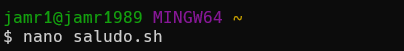

Al correr esa línea lo primero que va a hacer es abrirnos el bloc de notas vacío. Yo ya lo llené (y lógicamente lo tienen en el repo clonado), pero lo que hay adentro es esto:

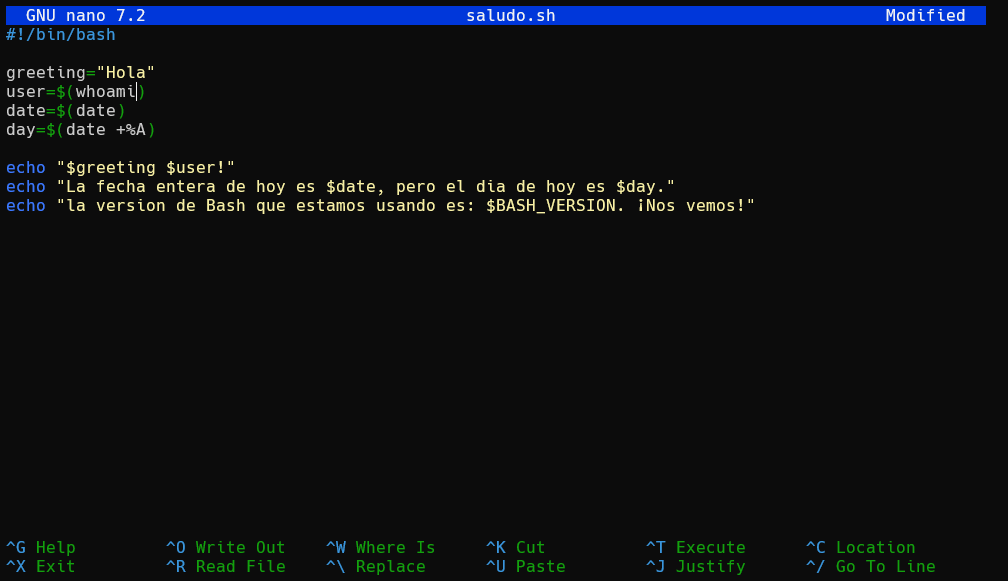

- Lo primero a notar es esa primera línea que parece un comentario. Eso lo que hace es decirle al intérprete de la consola que hay que ejecutarlo con bash (hay otros), y dónde está la ruta para encontrarlo. Es una línea default para poner y que se conoce como 'she-bang'(shabang).
- Bash, al igual que Python, tiene la posibilidad de poder definir variables. 

    - La primera es una variable llamada *greeting* que tiene el string "Hola".
    - *user* tiene el resultado de la ejecución del comando **whoami**, que dice el nombre del usuario. Vemos que se crean poniendo el signo pesos y envolviendo el comando entre paréntesis.
    - Se puede poner más interesante: podemos almacenar no sólo resultados de los comandos, sino también resultados parametrizados. Veamos que en *date* estamos almacenando la ejecución del comando **date**, pero en *day* hay un argumento adicional, con el que indicamos que queremos el nombre entero del día.
- Luego corremos el comando **echo** para que se devuelva a consola un texto que también cuenta con la definición de las variables, las cuales llamamos con el signo pesos.
- Como detalle, vemos también que hay algunas variables de entorno definidas de antemano, como BASH_VERSION.

Una vez guardado el archivo, hasta ahora sólo tenemos la definición del archivo con el código que tiene adentro, pero todavía no lo hicimos ejecutable. Para eso tenemos que correr el comando **chmod**, que modifica los permisos de un archivo, haciéndolo ejecutable agregándole el **+x**.

Para ejecutarlo, tenemos que indicarle la ruta al archivo pero antes con un **./**. En este caso, con `./saludo.sh`, el intérprete va a buscar el archivo saludo.sh que está en la misma carpeta, y lo corre.

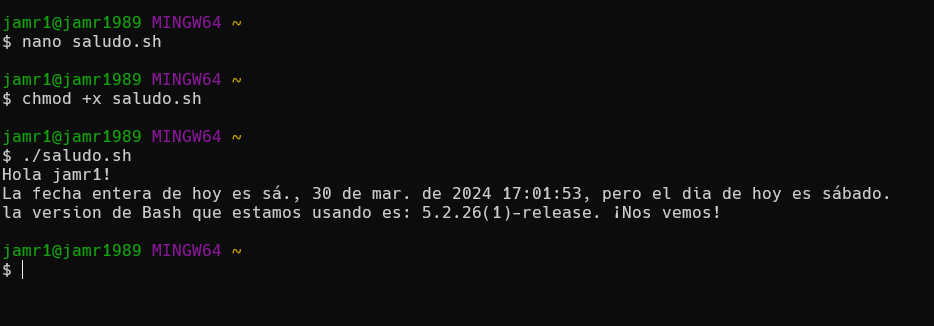

### 1.4. Conclusión

Vamos a concluir el apartado de Bash con algunos puntos y consejos interesantes.


1. Lleva tiempo acostumbrarse a moverse con sólo el teclado, pero una vez que lo hacés no hay vuelta atrás. Algunos comandos y shortcuts que sin duda vas a usar:
- Tab: autocompletar.
- Flecha arriba & Flecha abajo: vas viendo en consola los comandos que fuiste ejecutando (el historial).
- Ctrl+R: Búsqueda en el historial de ejecución.
- **clear** (Ctrl+L): limpia la terminal.
- **exit** (Ctrl+D): la cierra.
- **man**: la mayoría de las funciones de Bash tienen un manual, al que podés acceder con ese comando. Una forma parecida de hacer lo mismo es con el flag --help (por ejemplo, ls --help te devuelve en consola los argumentos y parámetros del comando ls).
- **mv**: es mover, en vez de copiar. Funciona igual.
- Ctrl+C: Interrumpir procesos. 
- Ctrl+Shift+C/V: copiar y pegar (hay que agregar el shift).
2. Bash cuenta con la posibilidad de crear *alias*, que son básicamente comandos que nosotros determinamos y que funcionan sólo en el contexto de nuestra terminal. Eso es extremadamente útil para tareas que hacemos de forma constante: supongamos que nos conectamos de forma remota a un servidor y levantamos una notebook desde ahí. En vez de hacer eso manualmente siempre, se podría hacer un alias que ejecute los comandos de manera secuencial para ahorranos tiempo.
3. La generación y manejo de variables de entorno suele ser bastante importante en entornos cloud y cuando entramos en el terreno de la productivización, dado que es la mejor manera de pasar parámetros de un proceso al otro (por ejemplo, una key de algún servicio, el nombre de alguna tabla, alguna variable que defina si estamos en producción o en test, etc.). 

# 2. VSCode

## 2.1. Conociendo la interfaz  

Si no tenés instalado VSCode, podés instalarlo con este [link](https://code.visualstudio.com/). Esta es la pantalla de inicio de VS code:

![image](imgs/12.png)

Aquí tenemos la opción de crear un proyecto nuevo o abrir uno reciente. En mi caso, se muestran proyectos recientes en los que he estado trabajando. Lo que haremos a continuación será crear un proyecto nuevo a partir de un repositorio en Github, es decir, vamos a clonar un repositorio. 

Hacemos click en Clone Git repository. 

Luego pegamos la siguiente URL: https://github.com/Python-World/python-mini-projects.git y hacemos click sobre el enlace Python-World/python-mini-projects como se muestra en la figura siguiente.

![image](imgs/13.png)

El próximo paso es seleccionar una carpeta en la que queremos que se aloje nuestro proyecto. En mi caso, creé una carpeta llamada captcha_generator porque así se llama el proyecto en el que vamos a trabajar. Luego de unos segundos, el repositorio habrá sido copiado en nuestra carpeta.

Una vez clonado el repositorio, estamos en condiciones de empezar a explorar el código. Cerramos la pestaña Get started y localizamos el archivo Captcha_generator.py ubicado en projects/catpcha_generator/.

![image](imgs/14.png)

Aquí nos detenemos un segundo y hacemos algunas observaciones:

- A la izquierda tenemos el explorer, donde podemos localizar todos los archivos de nuestro proyecto. Podemos acceder al explorer haciendo click en el primer ícono de la barra de actividad de la izquierda (más adelante veremos el resto).
- Abajo tenemos una barra de estado que nos dice:
  -      La rama del repo en la que estamos ubicados
  -      Si hay errores o advertencias (warnings) en nuestro código ( Vs code se encarga de revisar el código por nosotros!)
  -      En qué línea del código está ubicado el cursor
  -      Cuántos espacios tiene esa línea de código
  -      En qué lenguaje de programación está escrito el código
  -      Etc


## 2.2 Shortcuts

Como se imaginarán, hay infinidad de shortcuts para VS Code. El más importante que deben recordar es *ctrl + shift + P* el cual activa el **Command Palette**.

![image](imgs/15.png)

Esta especie de "buscador" nos permite escribir lo que necesitemos y nos mostrará el o los comandos que podemos ejecutar dentro de VS Code. Por ejemplo, imaginemos que queremos modificar los shortcuts de nuestro teclado. Abrimos la command pallette y escribimos "shortcut"

![image](imgs/16.png)

Entre las opciones que nos sugiere, hacemos click en Preferences: Keyword shortcuts y se abre una pestaña con la configuración de accesos directos para nuestro teclado.

![image](imgs/17.png)

VS Code tiene infinidad de opciones para "tunear" el IDE. Un poco de eso lo veremos en la siguiente sección, pero por lo pronto lo más importante a tener en cuenta es el tamaño de letra. Para ello podés hacer cmd + (o ctrl +) para agrandar el tamaño y cmd - (o ctr -) para achicarlo.

## 2.3. Extensiones clave

Aquí empezamos a tunear nuestro IDE. La idea no solo es dejarlo bello sino también que nos ayude a ser más productivos. Para sumar extensiones, debemos hacer click en el botón Extensions de la barra de actividad y luego utilizar el buscador para ir explorando las opciones disponibles. Empecemos! 

**TIP:** Siempre deben mirar la cantidad de descargas que tiene la extensión y quién es el autor de la misma. Esto sirve para asegurarnos que la extensión es confiable :)

#### vscode-icons (opcional)

Esta extensión simplemente hace que nuestros íconos se vean mejor.

![image](imgs/18.png)

Vemos cómo quedan los íconos:

![image](imgs/19.png)

#### Code Spell Checker

Para los hispano hablantes que queremos que nuestro código esté en inglés, esta extensión resulta particularmente útil dado que identifica errores de ortografía tanto en nuestro código como en los comentarios.

![image](imgs/22.png)

Una vez activada, esta extensión resalta las palabras que no identifica dentro del diccionario inglés, como por ejemplo *vallue* (la palabra correcta sería *value*). Haciendo click en la lamparita, podremos ver las opciones que nos sugiere la herramienta.

![image](imgs/23.png)

![image](imgs/24.png)

#### GitLens

Esta extensión la veremos en la sección de Git :)

![image](imgs/27.png)

## 2.4. Refactoring

Ahora que ya tenemos configurado nuestro IDE, veamos algunas técnicas que facilitarán nuestro trabajo a la hora de refactorizar código.

#### Renaming

A la hora de renombrar alguna clase u objeto, suele ocurrir que debemos modificar el nombre manualmente muchas veces a lo largo de nuestro código, incluso en varios archivos! Esto se puede hacer con 1 solo paso si hacemos uso de la función *Rename symbol*. 

Esta utilidad permite seleccionar un objeto, modificar su nombre y asegurarnos de que este cambio impacta en todas las instancias de ese objeto. Es tan simple como seleccionar un objeto, click derecho y luego hacer click en Rename symbol. Como resultado, se abre una ventana donde ingresamos el nuevo nombre y finalmente presionamos Enter. 

Listo! El cambio impactará en todas las intancias de ese objeto :D

![image](imgs/28.png)

#### Debugging

Aquí veremos un ejemplo sencillo sobre cómo debuggear nuestro código, es decir, cómo ejecutar nuestro código paso a paso, observando lo que ocurre en determinados puntos de interés llamados "breakpoints".

En vscode tenemos la opción hacer debugging haciendo click en el botón run & debug en la barra de actividad.

![image](imgs/29.png)

Nos va a pedir que generemos una configuración. Para ello, hacemos click en el lenguaje en que está escrito nuestro código (Python para nuestro ejemplo).

Luego de unos segundos se creará el archivo de configuración.

El paso siguiente consiste en definir los breakpoints, es decir, estos puntos donde la ejecución del código se detiene y nos permite observar el estado de las variables. Para este ejemplo, usaremos el archivo calculate.py dentro del directorio calculate_age y colocaremos un breakpoint en la línea 19 (punto rojo a la izquierda del 19).

![image](imgs/30.png)

En la terminal vemos que el código empezó a ejecutarse y nos pide que ingresemos nuestro nombre y edad.

Una vez ingresados los datos vemos que el código se detiene en nuestro breakpoint y en el extremo superior izquierdo aparece el apartado variables, donde podemos ver que tenemos 2 variables: leap_year y month cuyos valores son False y 2, respectivamente.

Para seguir avanzando hacemos click en play (botón azul en el extremo superior de la pantalla) y finalmente termina la ejecución de nuestro código cuando obtenemos el resultado de nuestra edad expresada en meses y días.

¡Te propongo como ejercicio colocar más breakpoints e ir visualizando la evolución de las variables a medida que se ejecuta el código!

# 3. Python ejecutable

Seguramente hayas visto en algún código de internet o por ahí una expresión más o menos parecida a esta:

In [2]:
def saludo():
    print("¡Hola! Python")

if __name__ == "__main__":
    saludo()

¡Hola! Python


La primera parte es bastante clara: es una función sencilla que imprime algo a consola. Pero la segunda parte es la que tiene una de las cosas interesantes que tiene Python para ofrecernos.

Esa definición condicional tiene el nombre técnico de *main guard* (pero en la práctica todo el mundo le dice "if main") y tiene una función muy interesante, que es permitirnos ejecutar código Python mediante el intérprete de consola (CLI).

Para que quede súper explícito veámoslo en la práctica, haciendo uso de las funciones mágicas de Jupyter: vamos a usar el comando *writefile* que, como el nombre indica, escribe el contenido de la celda en un archivo.

In [4]:
%%writefile saludo.py
def saludo():
    print("¡Hola! Python")

if __name__ == "__main__":
    saludo()

Writing saludo.py


Ahora tenemos este código de Python preparado para ser ejecutado mediante el intérprete de la consola. Para verlo en acción, vamos a recurrir a otro de los trucos de Jupyter que seguramente ya hayas visto: invocar Bash con el signo !.

In [5]:
!python saludo.py

¡Hola! Python


Lo que hicimos acá fue pedirle a Bash que interprete usando Python el archivo que acabamos de escribir, cosa que puede hacer porque tiene el main guard que le indica que tiene que correr una determinada función (saludo) desde el intérprete. ¿Qué pasa si no lo tiene?

In [6]:
%%writefile nope.py
def saludo():
    print("¡Hola! Python")

Writing nope.py


In [7]:
!python nope.py

Esencialmente, no pasa nada: el intérprete leyó el código, pero como no tiene el main guard, no lo ejecuta.

## 3.1 La variable \_\_name\_\_

La clave para que esto funcione está en una variable especial de Python, llamada **\_\_name\_\_**. 

- En caso de que el código que estamos corriendo sea ejecutado de forma principal, la variable \_\_name\_\_ tendrá el valor *main*.
- Pero si el código que estamos corriendo **está siendo importado por parte de otro módulo**, la variable \_\_name\_\_ recibe el nombre de dicho módulo.

En el caso del código que creamos (saludo.py), al ejecutarse en el main la variable \_\_name\_\_ toma ese nombre. El intérprete va leyendo línea por línea, y cuando llega al condicional, revisa cuál es el nombre de la variable \_\_name\_\_: dado que está en el main, ejecuta la función del saludo.

Parte de la idea del main guard también es poder controlar las ejecuciones y decidir qué hacer en función de cada situación. Veamos un ejemplo un poco más complejo:

In [8]:
%%writefile etl.py
from time import sleep

print("¡Hola!")

def process_data(data:str):
    print("Arrancando el procesamiento...")
    modified_data = "Estoy haciendo un ETL con " + data
    sleep(3)
    print("Lista la data.")
    return modified_data


def main():
    data = "datos de la web"
    print(data)
    modified_data = process_data(data)
    print(modified_data)

if __name__ == "__main__":
    main()


Writing etl.py


Si corremos este script de forma directa (es decir, con el CLI, desde bash) vamos a ejecutar sólo la parte del main:

In [9]:
!python etl.py

¡Hola!
datos de la web
Arrancando el procesamiento...
Lista la data.
Estoy haciendo un ETL con datos de la web


Un detalle importante es que la función main está llamando a la función *process_data* que está definida dentro del mismo código. 

Por otro lado, si importamos el módulo, podemos tener acceso a la función *process_data* de forma independiente:

In [10]:
import etl as etl
etl.process_data('una data re distinta')

¡Hola!
Arrancando el procesamiento...
Lista la data.


'Estoy haciendo un ETL con una data re distinta'

Un ejemplo un poquito más complejo aún:

In [11]:
%%writefile etl2.py
from time import sleep

print("¡Hola!")

def process_data(data):
    print("Arrancando el procesamiento...")
    modified_data = "Estoy haciendo un ETL con " + data
    sleep(3)
    print("Lista la data.")
    return modified_data

def read_data_from_web():
    print("Leyendo datos de la Web")
    data = "Datos de la web"
    return data

def write_data_to_database(data):
    print("Escribiendo a una base de datos")
    print(data)

def main():
    data = read_data_from_web()
    modified_data = process_data(data)
    write_data_to_database(modified_data)
    print('ETL completo')

if __name__ == "__main__":
    main()


Writing etl2.py


In [12]:
!python etl2.py

¡Hola!
Leyendo datos de la Web
Arrancando el procesamiento...
Lista la data.
Escribiendo a una base de datos
Estoy haciendo un ETL con Datos de la web
ETL completo


Algunas buenas prácticas y consejos:

- Aunque *main* como nombre no tiene ningún significado especial, siempre es buena práctica ponerle ese nombre al punto de entrada de la función.
- La variable \_\_name\_\_ puede tener varios nombres en función de dónde se esté importando el módulo, con lo que se puede ir monitoreando distintos puntos de ejecución y controlar qué pasa en cada escenario.
- En la función main no debería haber nada más que invocaciones a las funciones: nada de ponerse a desarrollarlas adentro.

## 3.2. Parametrización del código

Un paso muy importante para lograr un código prolijo y adaptable a múltiples situaciones es parametrizar el código. La idea es generar funciones o procesos cuyas variables podamos definir luego, de manera customizable. En su forma más elemental, no es más que esto:

In [ ]:
def me_llamo(nombre):
    print('Hola, mi nombre es ' + nombre + ', un gusto :)')

In [ ]:
me_llamo('Juan')

De poco serviría una función que sólo funcione bajo un cierto nombre, o inclusive que pueda tomar como parámetro un número (salvo que seas la hija de Elon Musk). Al momento de pensar nuestro código de una forma más profesional y prolija, tenemos que saber que situaciones como estas son totalmente posibles:

In [ ]:
def me_llamo(nombre, edad):
    print('Hola, mi nombre es ' + nombre + ', un gusto :)')
    print(f'Tengo {edad} años')

In [ ]:
me_llamo('Juan ', 'Maniglia')

Tenemos que encontrar una forma de poder pasarle argumentos a nuestras funciones cuando las corremos en CLI, y además, tenemos que forzar el tipo de las variables para evitar posibles malos usos.

Acá es donde entran librerías como **click**, que proveen una serie de herramientas para hacerlo de forma sencilla:

In [13]:
%%writefile saludador.py
import click

@click.command()
@click.option('--nombre', type=str, help='El nombre de la persona.')
@click.option('--edad', type=int, default=1, help='La edad de la persona.')
def me_llamo(nombre, edad):
    """Programa que arma una frase con nombre y edad."""
    click.echo(f"Hola, mi nombre es {nombre}, un gusto :)")
    click.echo(f'Tengo {edad} años')

if __name__ == '__main__':
    me_llamo()


Writing saludador.py


- Primero, notemos el import de click al principio.
- El decorador command() esencialmente inicializa la espera de parámetros.
- El decorador option() indica qué es lo que tiene que recibir la función, cuáles son los tipos y muchísimos otros parámetros. En este caso agregamos también la descripción (y ya van a ver para qué).
- Vale la mención: con click es preferible usar *echo* en vez de *print* para imprimir en consola porque tiene de fondo algunos agregados para que funcione mejor en caso de potenciales errores.

Con esto listo, ahora podemos pasarle los parámetros a nuestra función como un flag más:

In [14]:
!python saludador.py --nombre=Juan --edad=35

Hola, mi nombre es Juan, un gusto :)
Tengo 35 años


... y con toda la cobertura en caso de errores involuntarios :)

In [15]:
!python saludador.py --nombre=Juan --edad=Maniglia

Usage: saludador.py [OPTIONS]
Try 'saludador.py --help' for help.

Error: Invalid value for '--edad': 'Maniglia' is not a valid integer.


¿Y qué pasa si no entendemos por qué no funciona?

In [16]:
!python saludador.py --help

Usage: saludador.py [OPTIONS]

  Programa que arma una frase con nombre y edad.

Options:
  --nombre TEXT   El nombre de la persona.
  --edad INTEGER  La edad de la persona.
  --help          Show this message and exit.


Ahora queda claro por qué utilizamos el "help" en la definición del parámetro. ¡Fijate cuán sencillo es tener un programa bien documentado!

La configuración de estas parametrizaciones se puede poner tan compleja y/o elegante como querramos: de hecho, hasta podemos hacerlo de forma interactiva con el argumento *prompt*.

In [17]:
%%writefile saludador_interactivo.py
import click

@click.command()
@click.option('--nombre', type=str, prompt='¿Cómo te llamas?',
              help='El nombre de la persona.')
@click.option('--edad', type=int, default=1, help='La edad de la persona.', 
              prompt='¿Cuántos años tienes?')
def me_llamo(nombre, edad):
    """Programa que arma una frase con nombre y edad."""
    click.echo(f"Hola, mi nombre es {nombre}, un gusto :)")
    click.echo(f'Tengo {edad} años')

if __name__ == '__main__':
    me_llamo()

Writing saludador_interactivo.py


![image](imgs/39.png)

Como último detalle, vale la pena mencionar que de forma nativa, Python cuenta con la librería *argparse*, que es también muy buena, pero Click tiene dos ventajas:

- El uso de los decoradores al inicio lo hace un poco más sencillo de entender a primera vista.
- Click está un poco mejor enfocado en preparar una documentación abreviada y sencilla de forma automática.